In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
 

In [6]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
#Number of misiing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#Remove specified column or row
df.drop(["CustomerID"],axis=1,inplace=True)

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
x=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [14]:
x

array([['Male', 19, 15],
       ['Male', 21, 15],
       ['Female', 20, 16],
       ['Female', 23, 16],
       ['Female', 31, 17],
       ['Female', 22, 17],
       ['Female', 35, 18],
       ['Female', 23, 18],
       ['Male', 64, 19],
       ['Female', 30, 19],
       ['Male', 67, 19],
       ['Female', 35, 19],
       ['Female', 58, 20],
       ['Female', 24, 20],
       ['Male', 37, 20],
       ['Male', 22, 20],
       ['Female', 35, 21],
       ['Male', 20, 21],
       ['Male', 52, 23],
       ['Female', 35, 23],
       ['Male', 35, 24],
       ['Male', 25, 24],
       ['Female', 46, 25],
       ['Male', 31, 25],
       ['Female', 54, 28],
       ['Male', 29, 28],
       ['Female', 45, 28],
       ['Male', 35, 28],
       ['Female', 40, 29],
       ['Female', 23, 29],
       ['Male', 60, 30],
       ['Female', 21, 30],
       ['Male', 53, 33],
       ['Male', 18, 33],
       ['Female', 49, 33],
       ['Female', 21, 33],
       ['Female', 42, 34],
       ['Female', 30, 34],
      

In [15]:
y

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer(
    transformers=[('encoder',OneHotEncoder(),[0])],
    remainder='passthrough'
)

x=ct.fit_transform(x)

In [18]:
x

array([[0.0, 1.0, 19, 15],
       [0.0, 1.0, 21, 15],
       [1.0, 0.0, 20, 16],
       [1.0, 0.0, 23, 16],
       [1.0, 0.0, 31, 17],
       [1.0, 0.0, 22, 17],
       [1.0, 0.0, 35, 18],
       [1.0, 0.0, 23, 18],
       [0.0, 1.0, 64, 19],
       [1.0, 0.0, 30, 19],
       [0.0, 1.0, 67, 19],
       [1.0, 0.0, 35, 19],
       [1.0, 0.0, 58, 20],
       [1.0, 0.0, 24, 20],
       [0.0, 1.0, 37, 20],
       [0.0, 1.0, 22, 20],
       [1.0, 0.0, 35, 21],
       [0.0, 1.0, 20, 21],
       [0.0, 1.0, 52, 23],
       [1.0, 0.0, 35, 23],
       [0.0, 1.0, 35, 24],
       [0.0, 1.0, 25, 24],
       [1.0, 0.0, 46, 25],
       [0.0, 1.0, 31, 25],
       [1.0, 0.0, 54, 28],
       [0.0, 1.0, 29, 28],
       [1.0, 0.0, 45, 28],
       [0.0, 1.0, 35, 28],
       [1.0, 0.0, 40, 29],
       [1.0, 0.0, 23, 29],
       [0.0, 1.0, 60, 30],
       [1.0, 0.0, 21, 30],
       [0.0, 1.0, 53, 33],
       [0.0, 1.0, 18, 33],
       [1.0, 0.0, 49, 33],
       [1.0, 0.0, 21, 33],
       [1.0, 0.0, 42, 34],
 

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [20]:
y

array([30, 67,  4, 64, 31, 63,  4, 79,  1, 59, 12, 83, 13, 64, 11, 66, 28,
       55, 24, 82, 28, 60,  3, 60, 12, 68, 26, 52, 25, 72,  2, 60,  2, 77,
       12, 67, 15, 60, 21, 62, 28, 77, 29, 52, 23, 54, 46, 38, 33, 33, 43,
       51, 45, 51, 36, 32, 41, 37, 42, 37, 47, 46, 43, 50, 42, 50, 41, 39,
       50, 38, 46, 33, 40, 47, 38, 45, 44, 39, 43, 33, 42, 46, 32, 35, 48,
       37, 49, 46, 51, 37, 46, 32, 40, 31, 33, 43, 38, 41, 33, 40, 32, 39,
       50, 46, 47, 33, 41, 37, 34, 39, 43, 45, 33, 37, 39, 41, 34, 50, 34,
       48, 47, 31, 49, 76, 24, 64, 28, 80,  9, 62,  7, 62, 27, 58,  3, 73,
        5, 60,  8, 59,  3, 78, 31, 72, 10, 81, 29, 61, 18, 75, 15, 73, 17,
       63, 14, 74,  0, 65,  0, 60, 28, 69,  3, 78, 21, 62, 17, 80, 22, 53,
       11, 62,  8, 77, 11, 71, 13, 57, 12, 75, 26, 71, 13, 73, 30, 81, 20,
       56, 15, 70, 19, 57,  6, 76, 14, 66, 23, 61, 16, 69], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
x_train.shape

(160, 4)

In [24]:
x_test.shape

(40, 4)

In [27]:
y_train

array([56, 25, 40, 17, 41, 33, 67, 37, 11, 42, 61, 24, 41, 57, 34, 38, 37,
       76, 32, 62, 66, 44, 46, 42, 13, 19, 80, 71, 23, 41, 32, 46, 14, 62,
       60, 47, 30, 26, 75, 60, 39, 67, 14, 15, 15,  3,  1, 50, 31, 46, 33,
       73, 39, 72, 83, 12, 26, 47, 29, 33, 21, 28, 36,  6,  2, 48, 68, 43,
       38, 60, 82, 22, 34, 40, 39, 66, 45, 33, 28, 37,  7, 28, 41, 38, 40,
       65, 31, 10, 51, 37, 64, 70, 31, 32, 45, 13, 59, 33,  8, 80, 57, 47,
       33,  0, 11, 32, 46, 17, 77, 52, 60, 12,  5, 77, 43, 61, 50, 23, 60,
       29, 15,  3, 62, 50, 62, 12, 81, 46, 63, 13, 27, 28,  3, 18, 64, 21,
        4, 54, 38,  3, 49,  9, 78, 50, 81, 11, 58, 46, 43, 39, 48, 45, 20,
       12, 47, 34, 55, 37, 46, 33], dtype=int64)

In [28]:
y_test

array([ 4, 77, 71, 30, 69, 59, 39, 74, 41, 73, 16, 62, 75, 50, 43, 31, 28,
       49, 72, 63, 42, 60, 69, 64, 52, 43, 33,  8, 73, 51, 76,  0, 78, 51,
        2, 37, 79, 53, 35, 24], dtype=int64)

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [30]:
x_train

array([[-1.10554160e+00,  1.10554160e+00, -8.37933683e-01,
         1.62829275e+00],
       [ 9.04534034e-01, -9.04534034e-01,  8.73757751e-04,
        -1.18821363e+00],
       [-1.10554160e+00,  1.10554160e+00, -1.39713864e+00,
         6.35669842e-02],
       [ 9.04534034e-01, -9.04534034e-01,  2.80476238e-01,
         7.28575434e-01],
       [ 9.04534034e-01, -9.04534034e-01,  2.10575618e-01,
        -4.44968889e-01],
       [ 9.04534034e-01, -9.04534034e-01,  6.29979339e-01,
        -2.10260025e-01],
       [ 9.04534034e-01, -9.04534034e-01, -1.32723802e+00,
        -1.03174105e+00],
       [-1.10554160e+00,  1.10554160e+00,  2.02799174e+00,
        -6.01441466e-01],
       [ 9.04534034e-01, -9.04534034e-01,  8.39681199e-01,
         1.11975688e+00],
       [ 9.04534034e-01, -9.04534034e-01, -9.07834303e-01,
        -5.23205178e-01],
       [ 9.04534034e-01, -9.04534034e-01, -5.58331203e-01,
         6.89457290e-01],
       [-1.10554160e+00,  1.10554160e+00,  8.39681199e-01,
      

In [31]:
x_test

array([[ 0.81649658, -0.81649658,  0.06229672, -1.68300761],
       [-1.22474487,  1.22474487,  0.15129202,  0.77211977],
       [ 0.81649658, -0.81649658, -0.38267982,  0.80770133],
       [ 0.81649658, -0.81649658,  0.59626856,  1.19909845],
       [ 0.81649658, -0.81649658, -0.47167513,  0.48746732],
       [ 0.81649658, -0.81649658,  0.06229672,  0.30955954],
       [ 0.81649658, -0.81649658, -1.45062351, -0.01067447],
       [ 0.81649658, -0.81649658, -0.64966574,  0.45188576],
       [ 0.81649658, -0.81649658, -1.3616282 , -0.01067447],
       [-1.22474487,  1.22474487,  0.41827794,  0.45188576],
       [-1.22474487,  1.22474487, -0.20468921,  2.55119759],
       [-1.22474487,  1.22474487,  0.41827794,  0.20281487],
       [-1.22474487,  1.22474487,  0.06229672,  0.98560911],
       [ 0.81649658, -0.81649658,  1.30823102, -0.01067447],
       [-1.22474487,  1.22474487, -0.91665167, -0.18858225],
       [ 0.81649658, -0.81649658, -0.56067044,  0.38072265],
       [ 0.81649658, -0.

In [32]:
y_train

array([56, 25, 40, 17, 41, 33, 67, 37, 11, 42, 61, 24, 41, 57, 34, 38, 37,
       76, 32, 62, 66, 44, 46, 42, 13, 19, 80, 71, 23, 41, 32, 46, 14, 62,
       60, 47, 30, 26, 75, 60, 39, 67, 14, 15, 15,  3,  1, 50, 31, 46, 33,
       73, 39, 72, 83, 12, 26, 47, 29, 33, 21, 28, 36,  6,  2, 48, 68, 43,
       38, 60, 82, 22, 34, 40, 39, 66, 45, 33, 28, 37,  7, 28, 41, 38, 40,
       65, 31, 10, 51, 37, 64, 70, 31, 32, 45, 13, 59, 33,  8, 80, 57, 47,
       33,  0, 11, 32, 46, 17, 77, 52, 60, 12,  5, 77, 43, 61, 50, 23, 60,
       29, 15,  3, 62, 50, 62, 12, 81, 46, 63, 13, 27, 28,  3, 18, 64, 21,
        4, 54, 38,  3, 49,  9, 78, 50, 81, 11, 58, 46, 43, 39, 48, 45, 20,
       12, 47, 34, 55, 37, 46, 33], dtype=int64)

In [33]:
y_test

array([ 4, 77, 71, 30, 69, 59, 39, 74, 41, 73, 16, 62, 75, 50, 43, 31, 28,
       49, 72, 63, 42, 60, 69, 64, 52, 43, 33,  8, 73, 51, 76,  0, 78, 51,
        2, 37, 79, 53, 35, 24], dtype=int64)

In [ ]:
from sklearn.

C:\Users\DELL\AppData\Local\Temp\ipykernel_3288\18271471.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],bins=20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3288\18271471.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],bins=20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_328

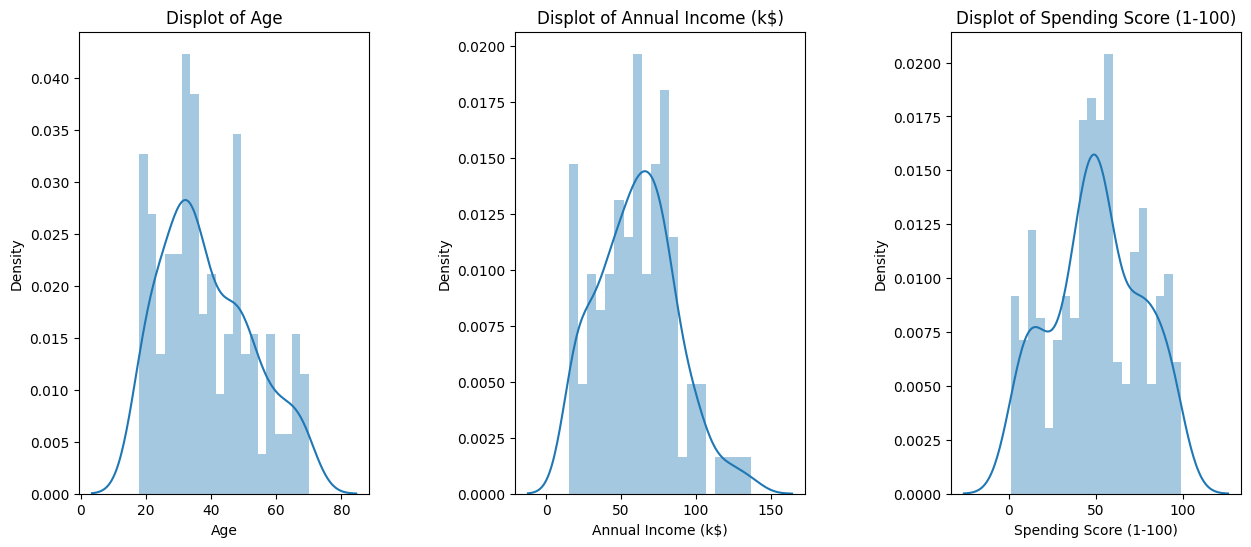

In [34]:
#Layout of graph using subplot
#Distplot is used to observe how the data is distributed in a particular dataset. 
# More specificly, distplot is one kind of Univariate Distribution Plot and works with single numerical variables.
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Displot of {}'.format(x))
plt.show()

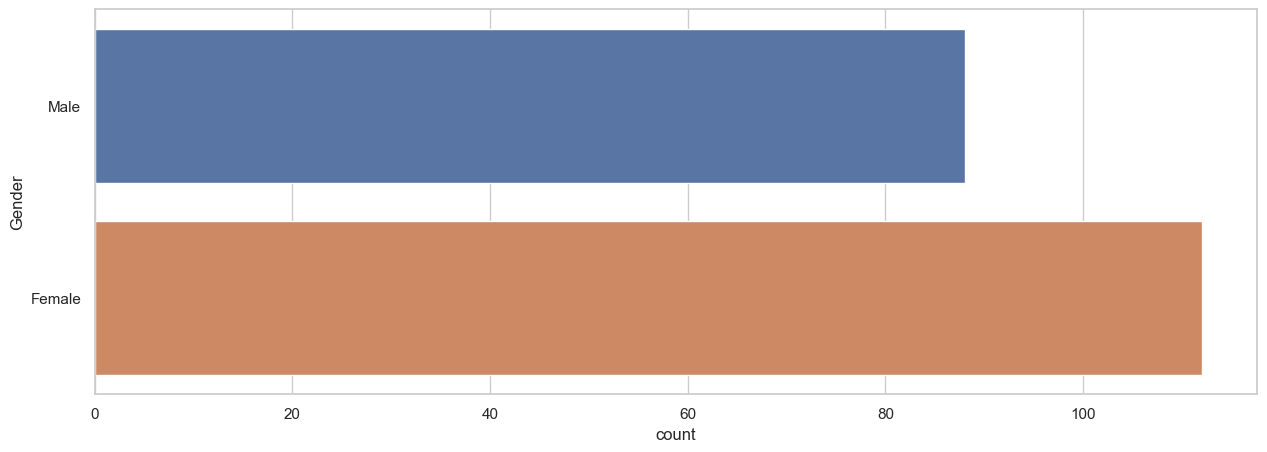

In [49]:
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

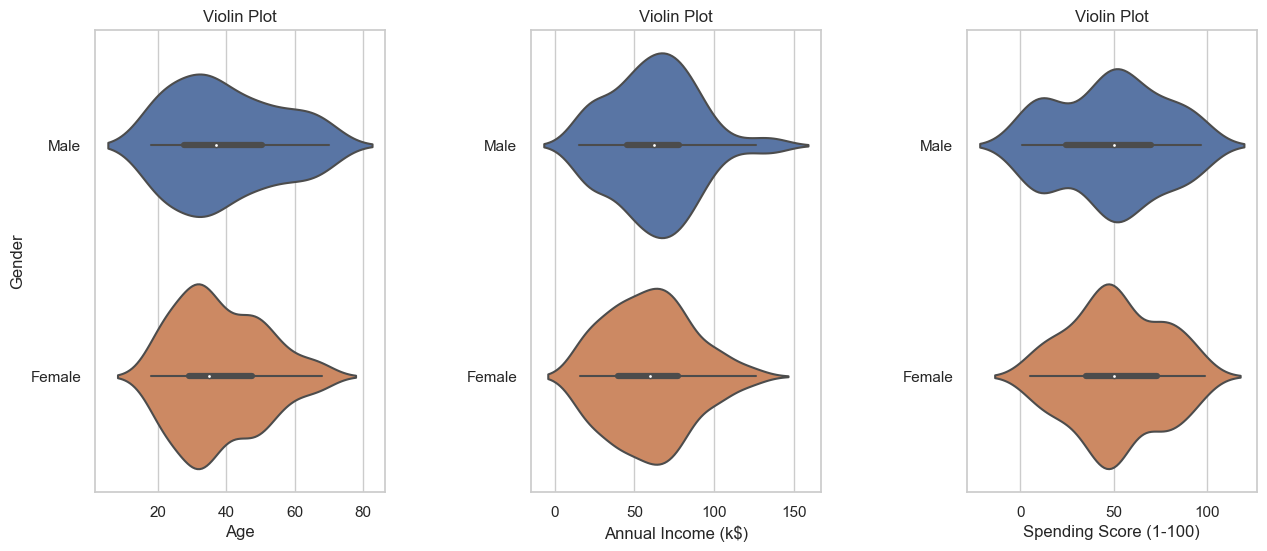

In [50]:
#Violin plots are similar to box plots,
# except that they also show the probability density of the data at different values.
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Gender',data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show()

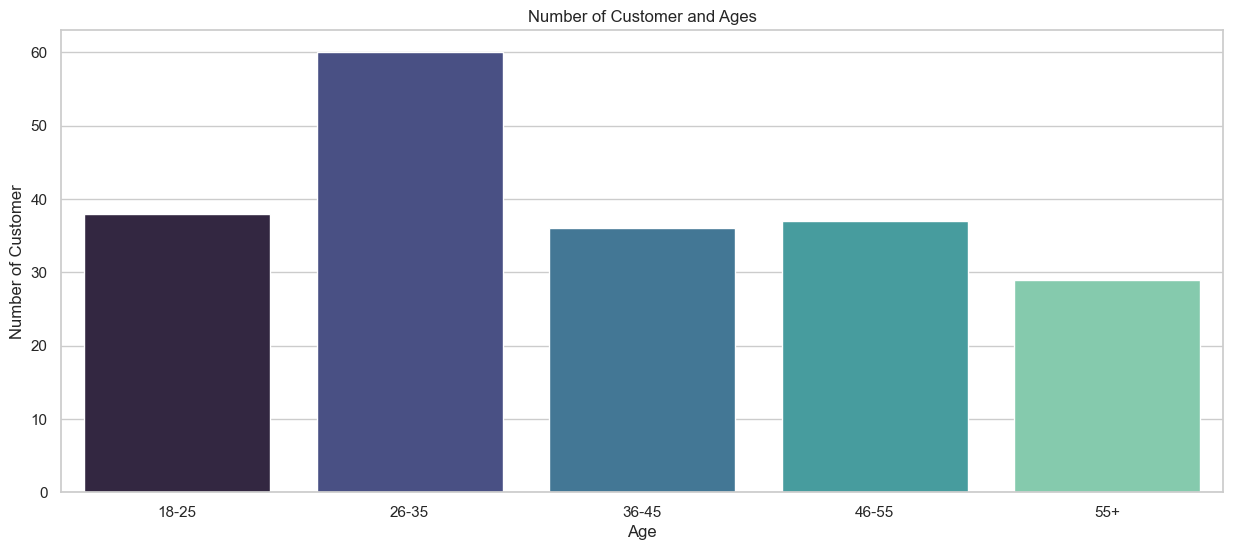

In [51]:
age_18_25=df.Age[(df.Age>=18)&(df.Age<=25)]
age_26_35=df.Age[(df.Age>=26)&(df.Age<=35)]
age_36_45=df.Age[(df.Age>=36)&(df.Age<=45)]
age_46_55=df.Age[(df.Age>=46)&(df.Age<=55)]
age_55above=df.Age[df.Age>=56]
agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

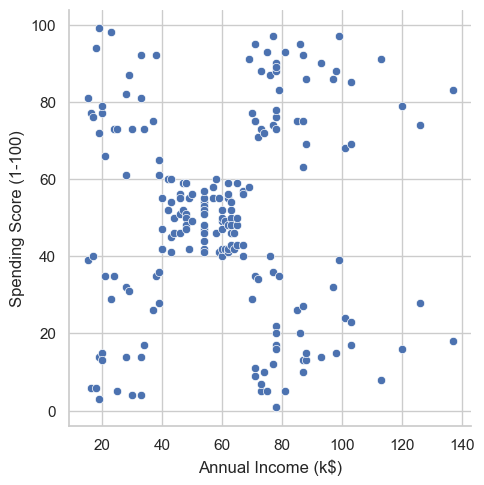

In [52]:
sns.relplot(x="Annual Income (k$)",y='Spending Score (1-100)',data=df)

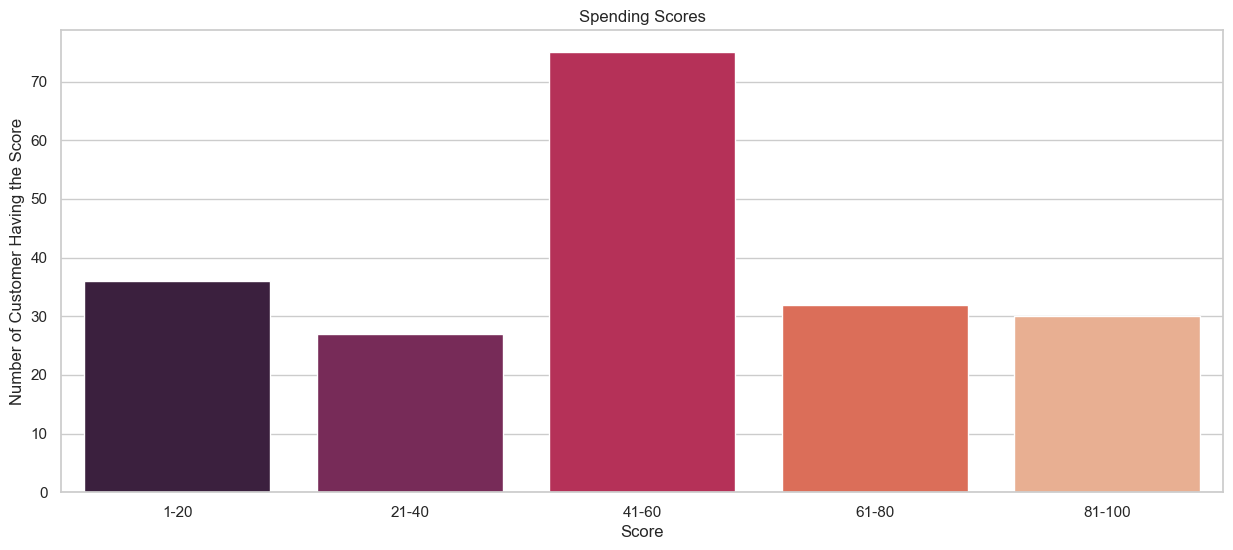

In [63]:
ss_1_20=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss_21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21)&(df["Spending Score (1-100)"]<=40)]
ss_41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41)&(df["Spending Score (1-100)"]<=60)]
ss_61_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61)&(df["Spending Score (1-100)"]<=80)]
ss_81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81)&(df["Spending Score (1-100)"]<+100)]
ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

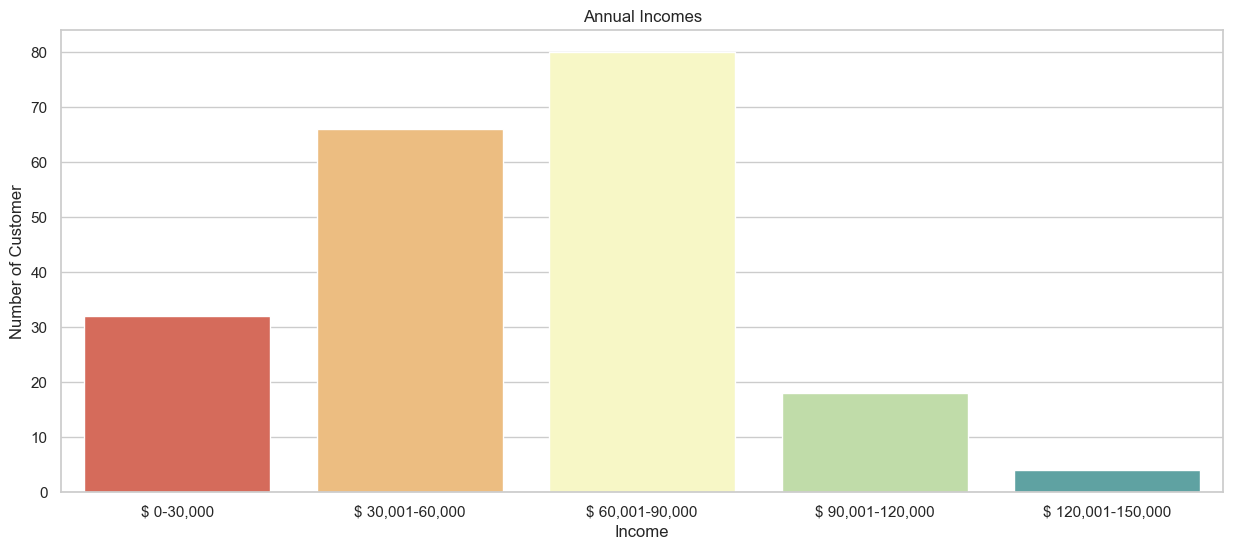

In [64]:
ai0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0)&(df["Annual Income (k$)"]<=30)]
ai31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31)&(df["Annual Income (k$)"]<=60)]
ai61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61)&(df["Annual Income (k$)"]<=90)]
ai91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)&(df["Annual Income (k$)"]<=120)]
ai121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)&(df["Annual Income (k$)"]<=150)]
ssx=["$ 0-30,000","$ 30,001-60,000","$ 60,001-90,000","$ 90,001-120,000","$ 120,001-150,000"]
ssy=[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\User

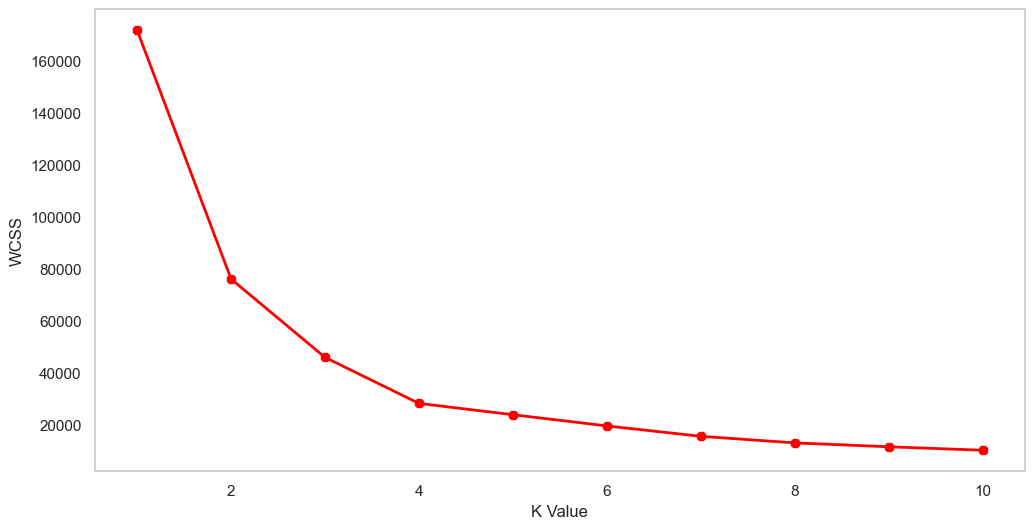

In [73]:
X1=df.loc[:, ["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [74]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


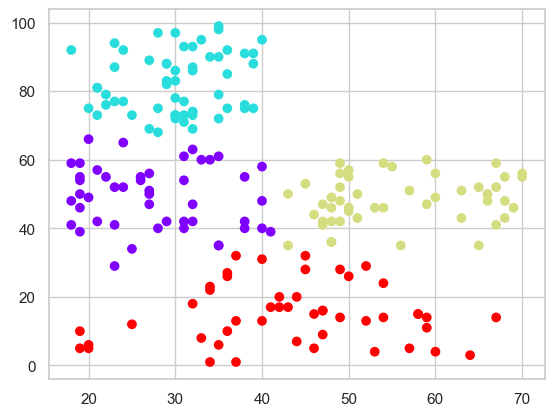

In [76]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')

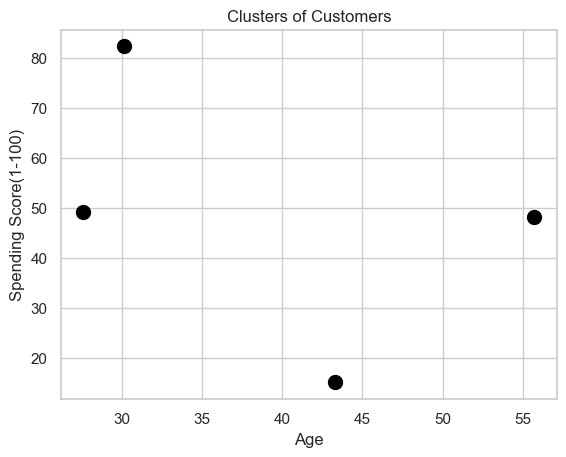

In [77]:
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\User

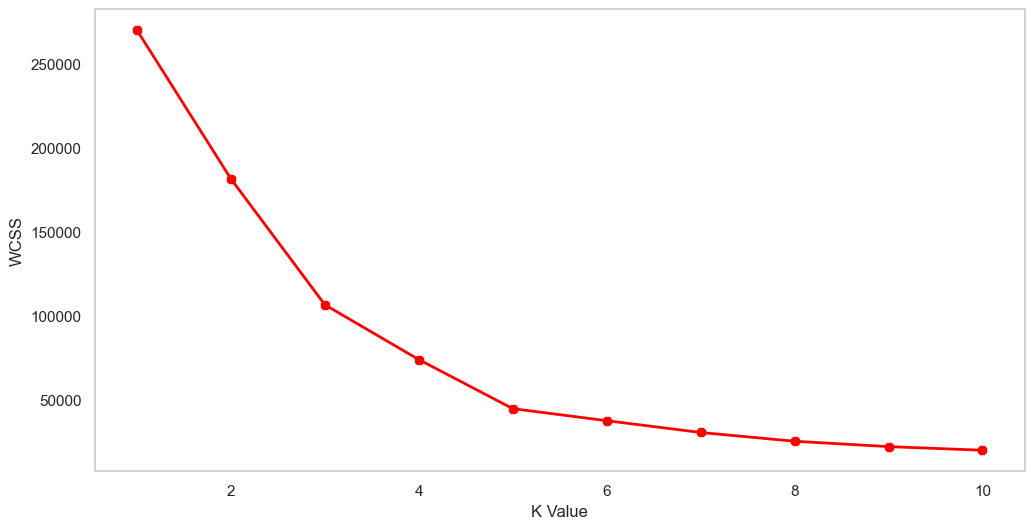

In [78]:
X2=df.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [80]:
kmeans = KMeans(n_clusters=5)
# return a label for each data point based on their cluster
label = kmeans.fit_predict(X2)
print(label)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 4 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 0 1 4 1 0 1 0 1 4 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]]


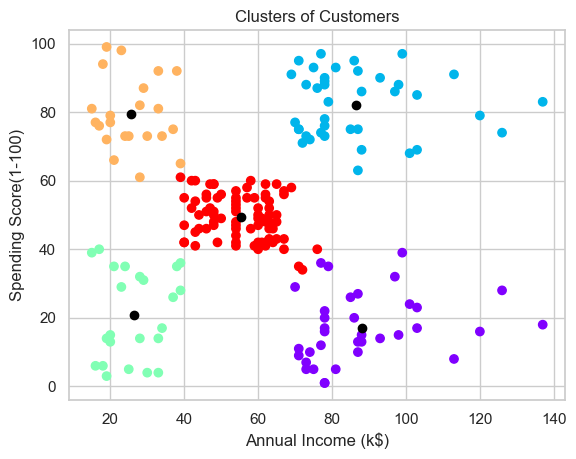

In [82]:
plt.scatter(X2[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\User

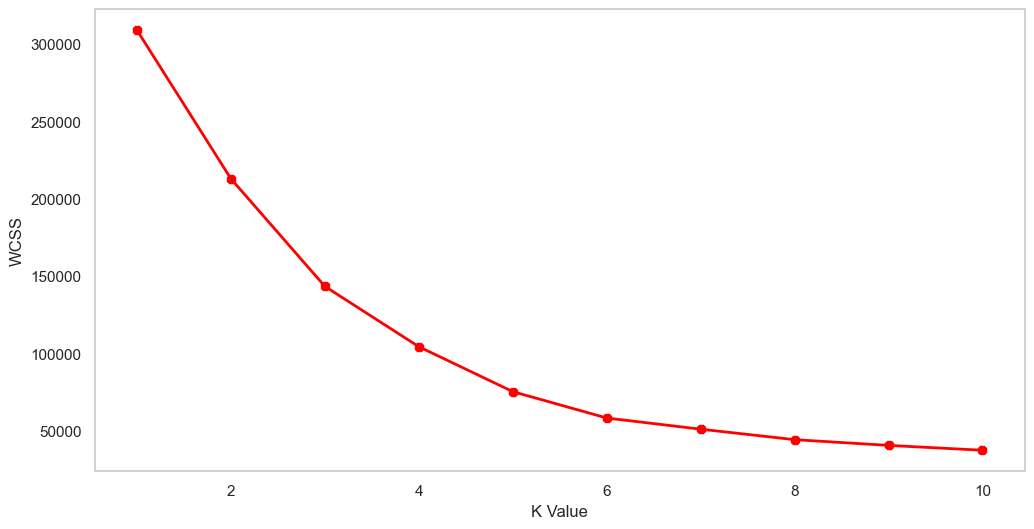

In [83]:
X3=df.iloc[:,1:]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()   

In [84]:
kmeans = KMeans(n_clusters=5)
# return a label for each data point based on their cluster
label = kmeans.fit_predict(X3)
print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [85]:
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]
 [25.52173913 26.30434783 78.56521739]]
